In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from aps_ai.beamline34IDC.simulation.facade.focusing_optics_interface import Movement

from aps_ai.beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles, EmptyBeamException
import beamline34IDC.optimization.common as opt_common
import beamline34IDC.optimization.movers as movers

from aps_ai.beamline34IDC.optimization.display_utils import LivePlotCallback
from aps_ai.beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import shutil
import glob
import IPython
from aps_ai.beamline34IDC.util.shadow.common import TTYInibitor

In [3]:
%matplotlib inline

In [4]:
DEFAULT_RANDOM_SEED = np.random.randint(100000)
print(DEFAULT_RANDOM_SEED)

90917


In [5]:
base_dir = '/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/'
orig_work_dir = f'{base_dir}/work_directory'
temp_work_dir = f'{base_dir}/tmp_work_dir_{DEFAULT_RANDOM_SEED}'

In [6]:
os.mkdir(temp_work_dir)

In [7]:
dat_files = glob.glob(f'{orig_work_dir}/*.dat')
for df in dat_files:
    shutil.copy(df, temp_work_dir)

In [8]:
os.chdir(temp_work_dir)

In [9]:
input_beam_path = "primary_optics_system_beam.dat"

In [10]:
move_motors = ['hkb_4']

In [11]:
motors_str = move_motors[0] if len(move_motors) == 1 else '_'.join(move_motors)
fig_save_path = f'{orig_work_dir}/figures/{motors_str}/'
if not os.path.isdir(fig_save_path):
    os.mkdir(fig_save_path)

In [12]:
# Focusing Optics System -------------------------
focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)

In [13]:
initial_absolute_positions = np.array(movers.get_absolute_positions(focusing_system, move_motors))
print(initial_absolute_positions)

[0.]


In [14]:
from aps_ai.beamline34IDC.util.shadow.io import redirected_output

In [15]:
focusing_system.get_photon_beam()

In [36]:
bytes('test test test', 'utf-8')

b'test test test'

In [37]:
t = bytes('test test test', 'utf-8')

In [38]:
t

b'test test test'

#### Without default tolerances applied: from default configs

In [14]:
import os

from aps_ai.beamline34IDC.simulation.facade import Implementors
from aps_ai.beamline34IDC.simulation.facade.focusing_optics_factory import focusing_optics_factory_method
from aps_ai.beamline34IDC.simulation.facade.focusing_optics_interface import Movement, AngularUnits, DistanceUnits

from aps_ai.beamline34IDC.util.shadow.common import plot_shadow_beam_spatial_distribution, load_shadow_beam, PreProcessorFiles
from aps_ai.beamline34IDC.util import clean_up

In [24]:
input_beam = load_shadow_beam("primary_optics_system_beam.dat")

# Focusing Optics System -------------------------

focusing_system = focusing_optics_factory_method(implementor=Implementors.SHADOW, bender=True, verbose=False)

focusing_system.initialize(input_photon_beam=input_beam,
                           rewrite_preprocessor_files=PreProcessorFiles.NO,
                           rewrite_height_error_profile_files=False, verbose=False)

In [27]:
??focusing_system.initialize

Signature:
focusing_system.initialize(
    input_photon_beam,
    input_features=<orangecontrib.ml.util.data_structures.DictionaryWrapper object at 0x1512628a9c50>,
    **kwargs,
)
Docstring: <no docstring>
Source:   
    def initialize(self,
                   input_photon_beam,
                   input_features=get_default_input_features(),
                   **kwargs):

        super().initialize(input_photon_beam, input_features, **kwargs)

        self.__vkb_widget = VKBMockWidget(self._vkb)
        self.__hkb_widget = HKBMockWidget(self._hkb)
File:      /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/beamline34IDC/simulation/shadow/focusing_optics.py
Type:      method


In [25]:
%%capture test
output_beam = focusing_system.get_photon_beam(verbose=False, near_field_calculation=False, debug_mode=False, random_seed=DEFAULT_RANDOM_SEED)

In [26]:
test.stdout

'write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_20577/VKB_bender_profile.dat written to disk.\nwrite_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_20577/HKB_bender_profile.dat written to disk.\n'

In [36]:
focusing_system.get_photon_beam()

write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.


In [28]:
from oasys.widgets import congruence

In [29]:
congruence.checkFile('VKB_bender_profile.dat')

'/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_20577/VKB_bender_profile.dat'

In [30]:
%%time 
beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED, debug_mode=False, near_field_calculation=False)

write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_20577/VKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_20577/HKB_bender_profile.dat written to disk.
CPU times: user 4.23 s, sys: 402 ms, total: 4.63 s
Wall time: 4.45 s


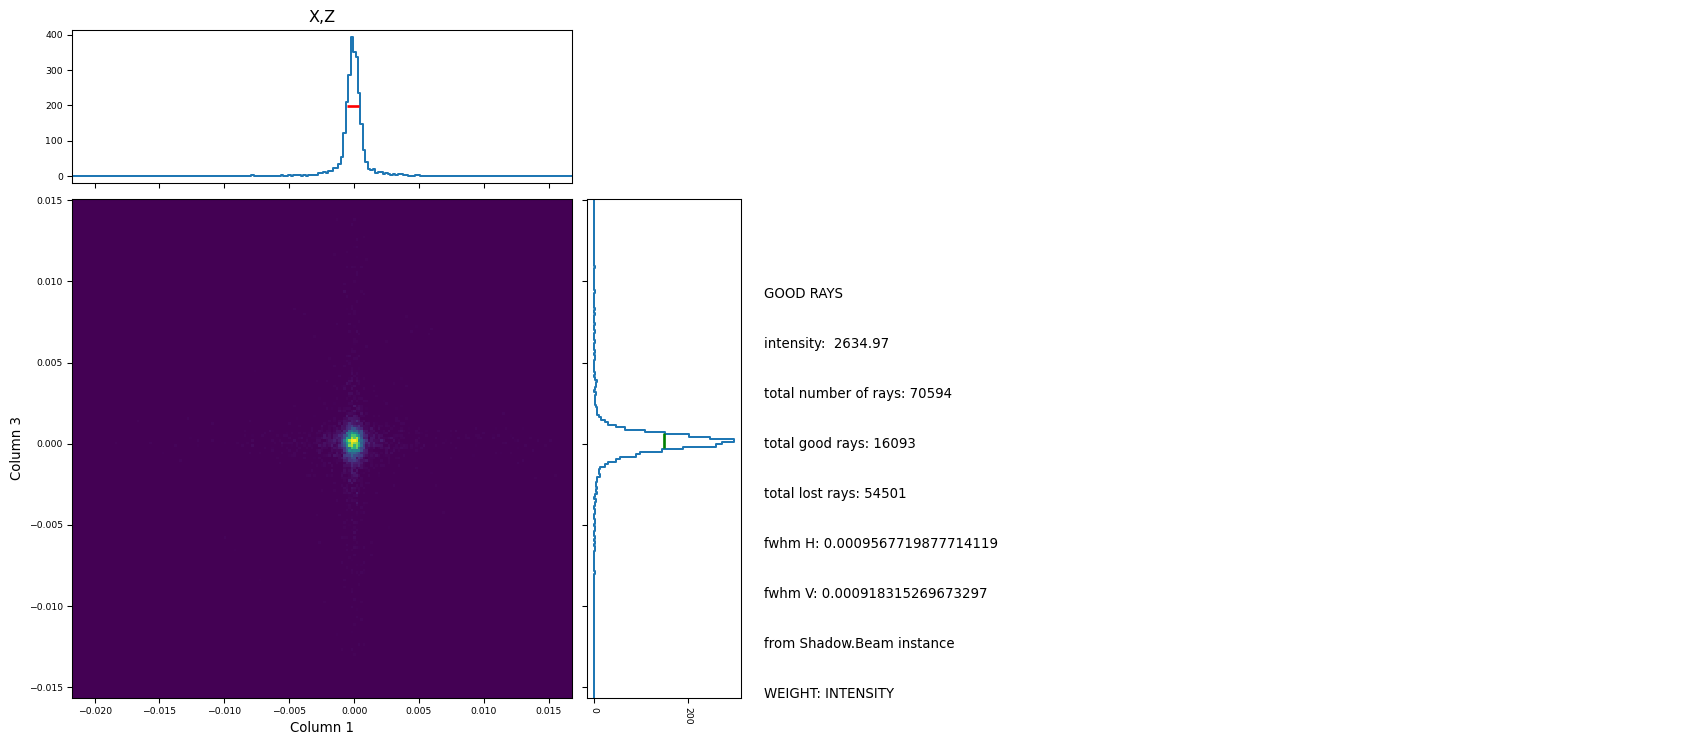

In [16]:
plot_shadow_beam_spatial_distribution(beam);

In [19]:
from aps_ai.beamline34IDC.optimization import ScipyOptimizer, SkoptGaussianProcessOptimizer

  0%|          | 0/5 [00:00<?, ?it/s]

Initial motor positions are [-0.02423399]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
Initial loss is 0.02396609993458277
initial guess is [-0.05318668]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.

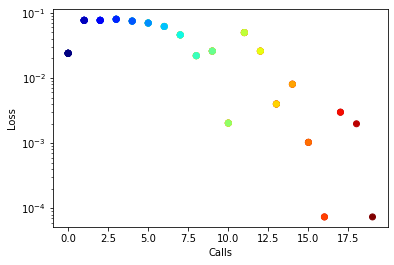

write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_Sy

 20%|██        | 1/5 [00:42<02:51, 42.97s/it]

Test 0 success True
Initial motor positions are [-0.15728596]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
Initial loss is 0.15665307962923006
initial guess is [-0.05259414]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


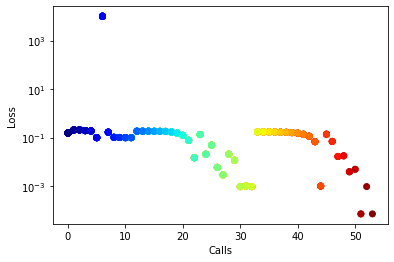

write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


initial guess is [-0.03490736]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skan

 40%|████      | 2/5 [02:27<03:56, 78.93s/it]

Test 1 success True
Initial motor positions are [0.06586806]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
Initial loss is 0.06577284727542894
initial guess is [-0.03272602]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/

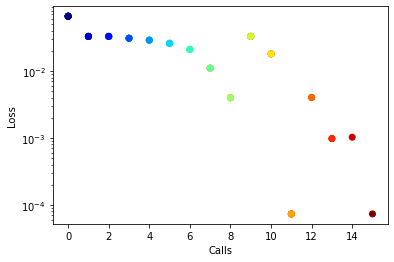

write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_Sy

 60%|██████    | 3/5 [03:02<01:58, 59.17s/it]

Test 2 success True
Initial motor positions are [0.03472496]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
Initial loss is 0.03487837164777941
initial guess is [0.03893838]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/H

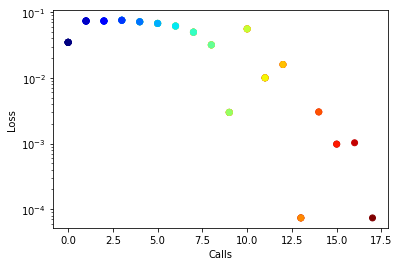

write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_Sy

 80%|████████  | 4/5 [03:42<00:51, 51.39s/it]

Test 3 success True
Initial motor positions are [0.06641793]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
Initial loss is 0.06577284727542894
initial guess is [0.00710691]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
initial guess is [-0.00121094]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Cont

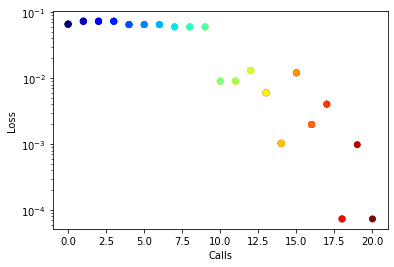

write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_Sy

100%|██████████| 5/5 [04:27<00:00, 53.50s/it]

Test 4 success True
CPU times: user 4min 11s, sys: 27.5 s, total: 4min 39s
Wall time: 4min 27s


In [23]:
%%time
initial_centroids = []
initial_out_beams = []
absolute_movements = []

start_guesses = []
overall_successes = []
final_centroids = []
final_out_beams = []

min_trans = -0.2
max_trans = 0.2

for outer in tqdm(range(5)):
    translations = np.random.uniform(min_trans, max_trans, size=1)
    test_absolute_movements = initial_absolute_positions + translations
    print("Initial motor positions are", test_absolute_movements)
    absolute_movements.append(test_absolute_movements)
    
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
    centroid, out_beam, hist, dw = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    
    initial_centroids.append(centroid)
    initial_out_beams.append(out_beam)
    
    
    opt_trial = ScipyOptimizer(focusing_system, 
                                          motor_types=move_motors, 
                                          initial_motor_positions=test_absolute_movements, 
                                          random_seed=DEFAULT_RANDOM_SEED)
    
    plot_callback = LivePlotCallback(opt_trial)
    opt_trial.set_optimizer_options(callback = plot_callback.call)
    opt_results, guesses, solution, success = opt_trial.trials(verbose=False)
    plot_callback.close()
    focusing_system = opt_trial.focusing_system
    
    start_guesses.append(guesses)
    overall_successes.append(success)
    centroid, out_beam, *_ = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    final_centroids.append(centroid)
    final_out_beams.append(out_beam)
    print(f'Test {outer} success {success}')

In [17]:
%%time
initial_centroids = []
initial_out_beams = []
absolute_movements = []

start_guesses = []
overall_successes = []
final_centroids = []
final_out_beams = []

min_trans = -0.2
max_trans = 0.2

for outer in tqdm(range(5)):
    translations = np.random.uniform(min_trans, max_trans, size=1)
    test_absolute_movements = initial_absolute_positions + translations
    print("Initial motor positions are", test_absolute_movements)
    absolute_movements.append(test_absolute_movements)
    
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
    centroid, out_beam, hist, dw = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    
    initial_centroids.append(centroid)
    initial_out_beams.append(out_beam)
    
    
    opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                          motor_types=move_motors, 
                                          initial_motor_positions=test_absolute_movements, 
                                          random_seed=DEFAULT_RANDOM_SEED)
    
    plot_callback = LivePlotCallback(opt_trial)
    opt_trial.set_scipy_optimizer_options(callback = plot_callback.call)
    opt_results, guesses, solution, success = opt_trial.trials(verbose=False)
    plot_callback.close()
    focusing_system = opt_trial.focusing_system
    
    start_guesses.append(guesses)
    overall_successes.append(success)
    centroid, out_beam, *_ = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    final_centroids.append(centroid)
    final_out_beams.append(out_beam)
    print(f'Test {outer} success {success}')

  0%|          | 0/5 [00:00<?, ?it/s]

Initial motor positions are [0.01402895]
write_shadow_surface: File for SHADOW /gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/tmp_work_dir_49166/HKB_bender_profile.dat written to disk.


  0%|          | 0/5 [00:01<?, ?it/s]


TypeError: Can't instantiate abstract class OptimizationCommon with abstract methods _optimize, set_optimizer_options

#### Applying tolerances:
xatol : (tolerance in x-motion) of 0.25 $\mu$m, which is the resolution of the motors in the experiment.

In [30]:
# Focusing Optics System -------------------------
focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)

In [42]:
focusing_system = movers.move_motors(focusing_system, move_motors, absolute_movements[2],  movement='absolute')

In [45]:
opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                          motor_types=move_motors, 
                                          initial_motor_positions=absolute_movements[2],
                                          random_seed=DEFAULT_RANDOM_SEED)

plot_callback = LivePlotCallback(opt_trial)
opt_trial.set_scipy_optimizer_options(xatol=0.25e-3, maxfev=50, callback=plot_callback.call)

In [46]:
opt_results, guesses, solution, success = opt_trial.trials(
    n_guesses=1, verbose=True, initial_guess=start_guesses[2][0])
plot_callback.close()

Initial loss is 9.597098301029495e-05
initial guess is [-0.00840166]
motors ['hkb_4'] trans [-0.00840166] current loss 0.007944240401161613
motors ['hkb_4'] trans [-0.00882174] current loss 0.007944240401161613


In [47]:
initial_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in initial_out_beams]
initial_hists, initial_dws = zip(*initial_hists_dws)

In [48]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [49]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [50]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

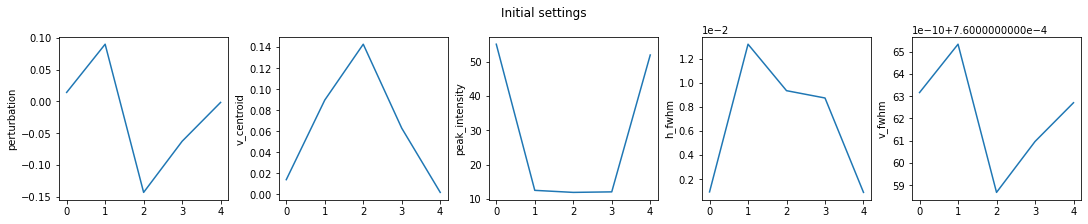

In [51]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/initial_metrics.png', bbox_inches='tight')

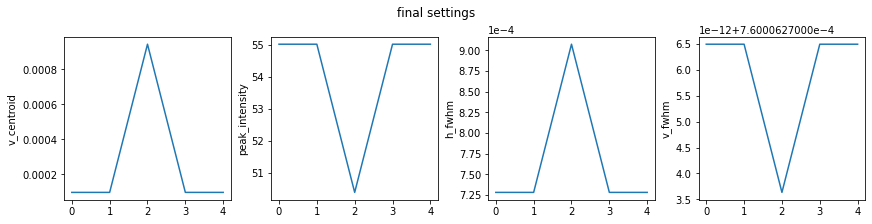

In [52]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/final_metrics.png', bbox_inches='tight')

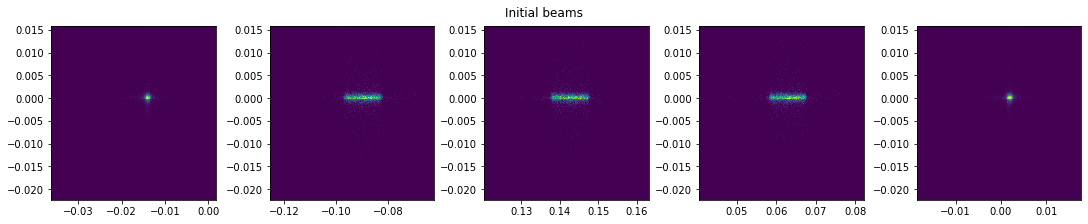

In [55]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/initial_beams.png', bbox_inches='tight')

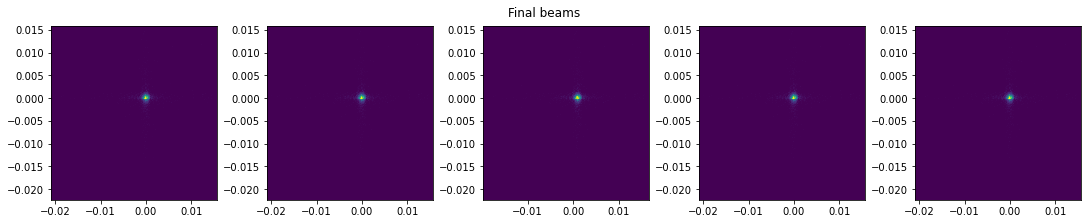

In [56]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/final_beams.png', bbox_inches='tight')

In [57]:
clean_up()

In [58]:
shutil.rmtree(temp_work_dir)

### Gaussian optimization with early stopping callbacks for x and f values.

In [120]:
from skopt.callbacks import DeltaXStopper, DeltaYStopper, DeadlineStopper
from aps_ai.beamline34IDC.optimization import configs

0it [00:00, ?it/s]

Initial loss is 0.014027727143469233


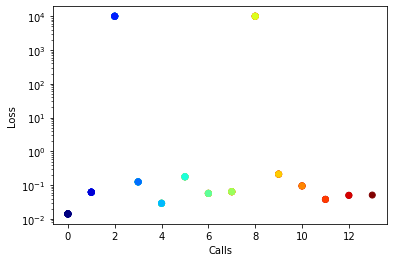

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
1it [00:25, 25.20s/it]

Loss is 0.028943286650109246 for x [-0.04301642898941843] and min acceptable value is 0.0001
Solution is not acceptable.
Test 0 success False
Initial loss is 0.08963955782117244


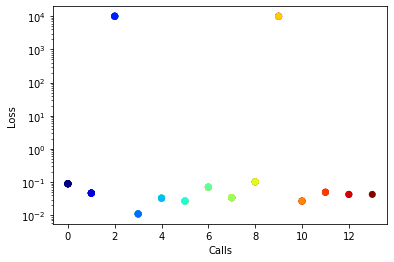

2it [00:49, 24.59s/it]

Loss is 0.011039053541797952 for x [-0.0791768686393388] and min acceptable value is 0.0001
Solution is not acceptable.
Test 1 success False
Initial loss is 0.1426986484342983


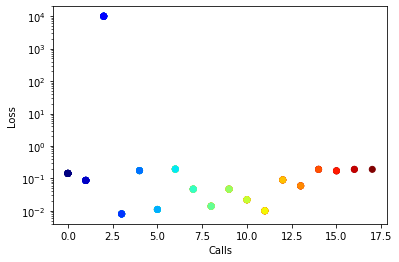

3it [01:23, 29.01s/it]

Loss is 0.008046125724458918 for x [0.15101386021890567] and min acceptable value is 0.0001
Solution is not acceptable.
Test 2 success False
Initial loss is 0.06292793958241681


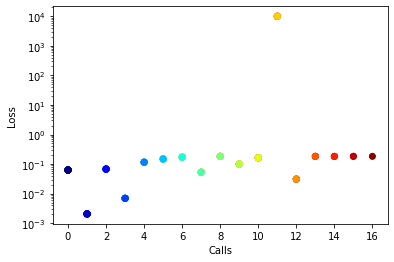

4it [01:54, 29.72s/it]

Loss is 0.006942962990728964 for x [0.05577648746174246] and min acceptable value is 0.0001
Solution is not acceptable.
Test 3 success False
Initial loss is 0.0019420093218740359


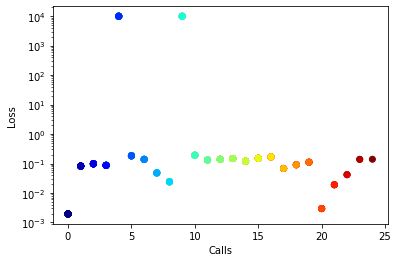

5it [02:41, 32.24s/it]

Loss is 0.0029433382501683697 for x [-0.0019105432251688703] and min acceptable value is 0.0001
Solution is not acceptable.
Test 4 success False
CPU times: user 3min 11s, sys: 2min 57s, total: 6min 9s
Wall time: 2min 41s


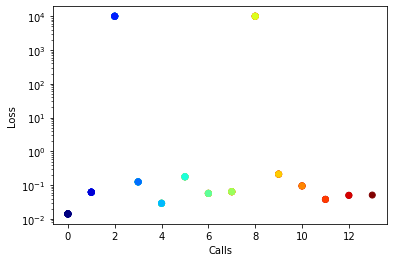

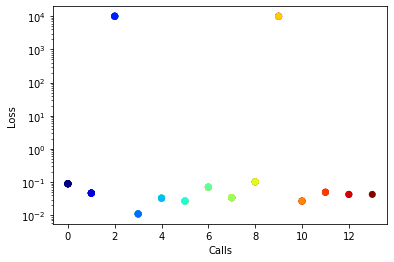

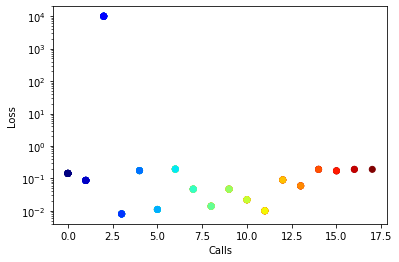

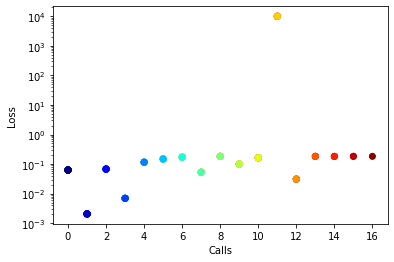

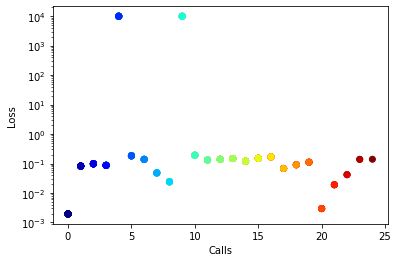

In [121]:
%%time
start_guesses_gp = []
overall_successes_gp = []
final_out_beams_gp = []
for outer, test_absolute_movements in tqdm(enumerate(absolute_movements)):
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
    centroid, out_beam, hist, dw = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    
    opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                              motor_types=move_motors, 
                                              initial_motor_positions=test_absolute_movements, 
                                              random_seed=DEFAULT_RANDOM_SEED,
                                              opt_platform='skopt')
    deltax_callback = DeltaXStopper(configs.DEFAULT_MOTOR_TOLERANCES['hkb_4'])
    deltay_callback = DeltaYStopper(configs.DEFAULT_LOSS_TOLERANCES['centroid'])
    deadline_callback = DeadlineStopper(60)
    plot_callback = LivePlotCallback(opt_trial)
    opt_trial.set_gaussian_process_optimizer_options(n_calls=150, 
                                                     callback=[deltax_callback, 
                                                               deltay_callback, 
                                                               deadline_callback,
                                                               plot_callback.call])
    plot_callback.close()

    opt_results, guesses, solution, success = opt_trial.trials(1, verbose=False)
    
    focusing_system = opt_trial.focusing_system
    start_guesses_gp.append(guesses)
    overall_successes_gp.append(success)
    final_out_beams_gp.append(out_beam)
    print(f'Test {outer} success {success}')

### Combined gaussian and nelder-mead optimization

In [119]:
from skopt.callbacks import DeltaXStopper, DeltaYStopper, DeadlineStopper
from aps_ai.beamline34IDC.optimization import configs

0it [00:00, ?it/s]

Initial loss is 0.014027727143469233


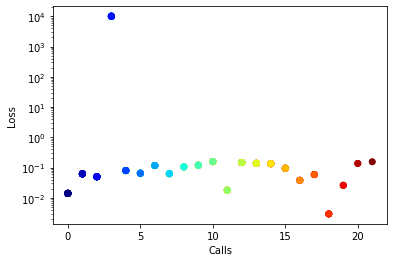

Loss is 0.002943338250168484 for x [-0.015200369907730577] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.014027727143469233
initial guess is [-0.01520037]


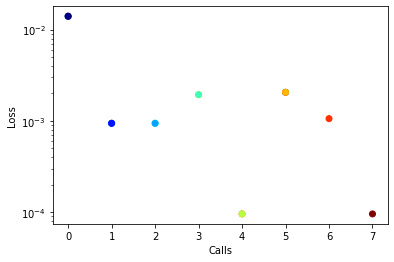

1it [00:58, 58.00s/it]

Test 0 success True
Initial loss is 0.08963955782117244


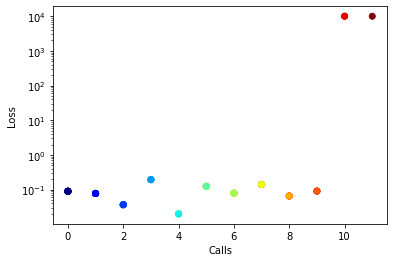

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


Loss is 0.01995597316343584 for x [-0.11063141974804028] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.08963955782117244
initial guess is [-0.11063142]


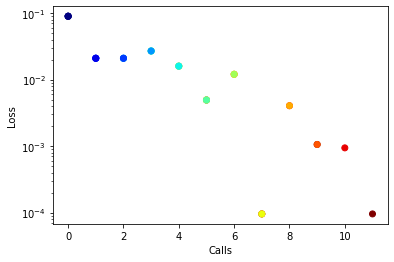

2it [01:36, 46.41s/it]

Test 1 success True
Initial loss is 0.1426986484342983


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


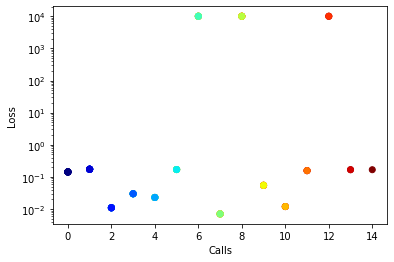

Loss is 0.007049140236533108 for x [0.15090166039425346] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.1426986484342983
initial guess is [0.15090166]


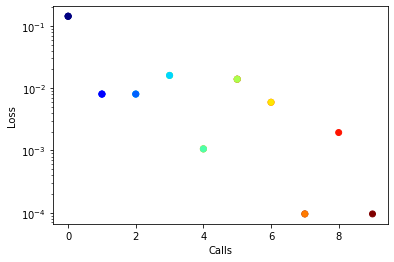

3it [02:17, 43.92s/it]

Test 2 success True
Initial loss is 0.06292793958241681


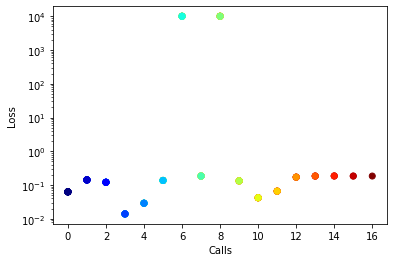

Loss is 0.013946772455188558 for x [0.04870804309471327] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.06292793958241681
initial guess is [0.04870804]


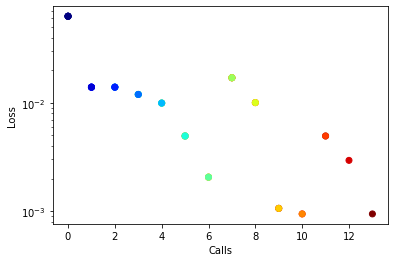

4it [03:09, 47.17s/it]

Test 3 success False
Initial loss is 0.0019420093218740359


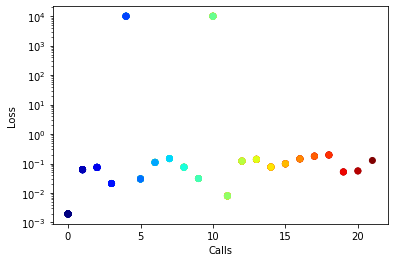

Loss is 0.007944240401148755 for x [-0.00747335680695449] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.0019420093218740359
initial guess is [-0.00747336]


5it [03:56, 47.25s/it]

Test 4 success False
CPU times: user 4min 20s, sys: 3min 1s, total: 7min 22s
Wall time: 3min 56s


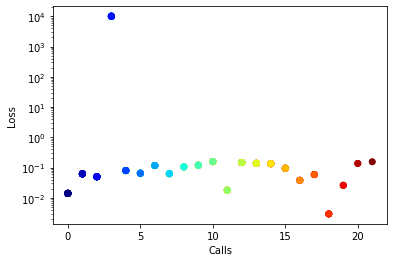

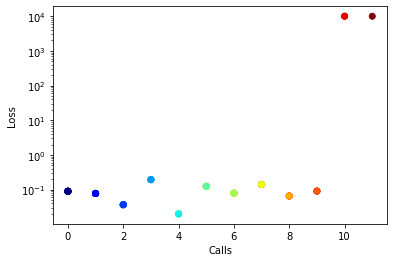

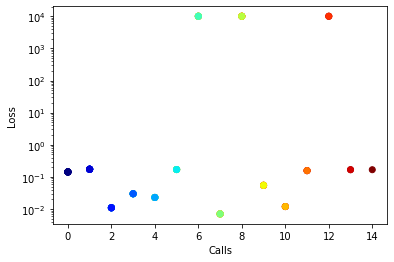

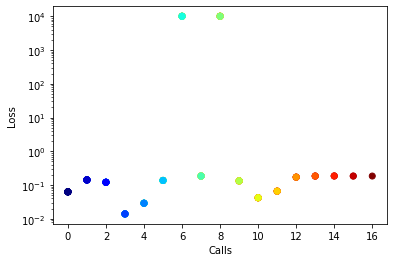

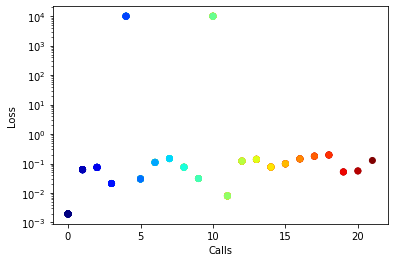

In [118]:
%%time
start_guesses_gp = []
overall_successes_gp = []
final_out_beams_gp = []
for outer, test_absolute_movements in tqdm(enumerate(absolute_movements)):
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
    centroid, out_beam, hist, dw = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    
    opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                              motor_types=move_motors, 
                                              initial_motor_positions=test_absolute_movements, 
                                              random_seed=DEFAULT_RANDOM_SEED,
                                              opt_platform='skopt')
    deltax_callback = DeltaXStopper(configs.DEFAULT_MOTOR_TOLERANCES['hkb_4'])
    deltay_callback = DeltaYStopper(configs.DEFAULT_LOSS_TOLERANCES['centroid'])
    deadline_callback = DeadlineStopper(60)
    plot_callback = LivePlotCallback(opt_trial)
    opt_trial.set_gaussian_process_optimizer_options(n_calls=20, 
                                                     callback=[deltax_callback, 
                                                               deltay_callback, 
                                                               deadline_callback,
                                                               plot_callback.call])
    plot_callback.close()

    opt_results, guesses, solution, success = opt_trial.trials(1, verbose=False)
    
    if not success:
        print('Trying Nelder-Mead from minimum position')
        focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
        opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                              motor_types=move_motors, 
                                              initial_motor_positions=test_absolute_movements, 
                                              random_seed=DEFAULT_RANDOM_SEED,
                                              opt_platform='scipy')
        plot_callback = LivePlotCallback(opt_trial)
        opt_trial.set_scipy_optimizer_options(callback = plot_callback.call)
        opt_results, guesses, solution, success = opt_trial.trials(1, initial_guess=opt_results[0].x, verbose=False)
        plot_callback.close()
    
    focusing_system = opt_trial.focusing_system
    start_guesses_gp.append(guesses)
    overall_successes_gp.append(success)
    final_out_beams_gp.append(out_beam)
    print(f'Test {outer} success {success}')

### Gaussian optimization in Integer space with early stopping callbacks for x and f values.

0it [00:00, ?it/s]

Initial loss is 0.014027727143469233


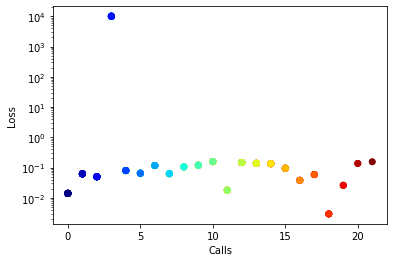

Loss is 0.002943338250168484 for x [-0.015200369907730577] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.014027727143469233
initial guess is [-0.01520037]


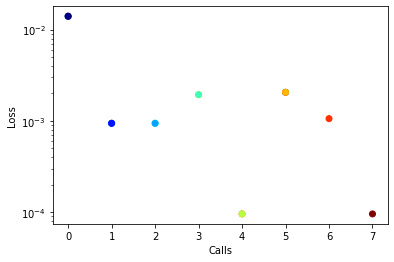

1it [00:58, 58.00s/it]

Test 0 success True
Initial loss is 0.08963955782117244


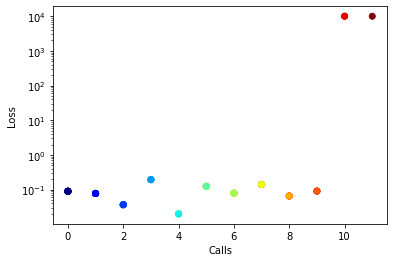

/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


Loss is 0.01995597316343584 for x [-0.11063141974804028] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.08963955782117244
initial guess is [-0.11063142]


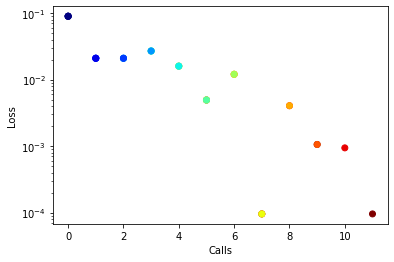

2it [01:36, 46.41s/it]

Test 1 success True
Initial loss is 0.1426986484342983


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID
/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/orangecontrib/shadow/widgets/special_elements/bl/hybrid_control.py:168: RankWarning: Polyfit may be poorly conditioned
  hy_readfiles(input_parameters, calculation_parameters)	#Read shadow output files needed by HYBRID


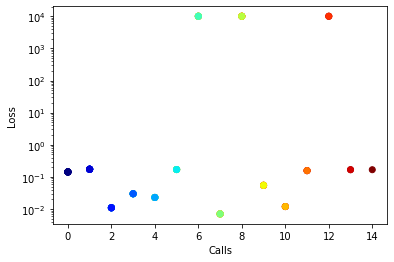

Loss is 0.007049140236533108 for x [0.15090166039425346] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.1426986484342983
initial guess is [0.15090166]


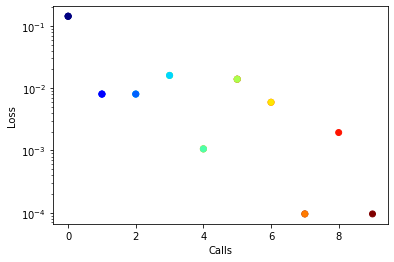

3it [02:17, 43.92s/it]

Test 2 success True
Initial loss is 0.06292793958241681


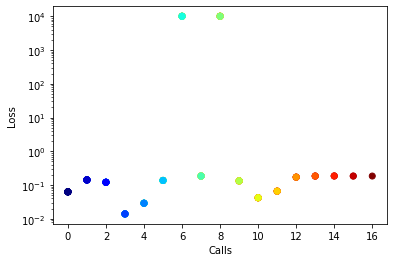

Loss is 0.013946772455188558 for x [0.04870804309471327] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.06292793958241681
initial guess is [0.04870804]


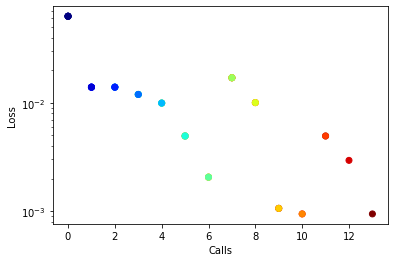

4it [03:09, 47.17s/it]

Test 3 success False
Initial loss is 0.0019420093218740359


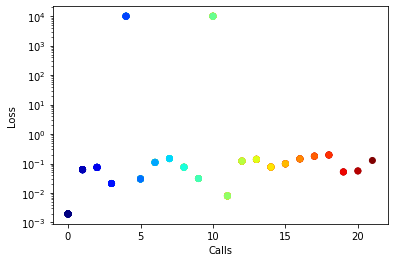

Loss is 0.007944240401148755 for x [-0.00747335680695449] and min acceptable value is 0.0001
Solution is not acceptable.
Trying Nelder-Mead from minimum position
Initial loss is 0.0019420093218740359
initial guess is [-0.00747336]


5it [03:56, 47.25s/it]

Test 4 success False
CPU times: user 4min 20s, sys: 3min 1s, total: 7min 22s
Wall time: 3min 56s


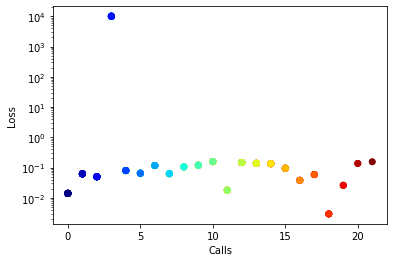

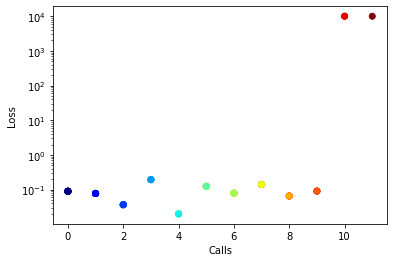

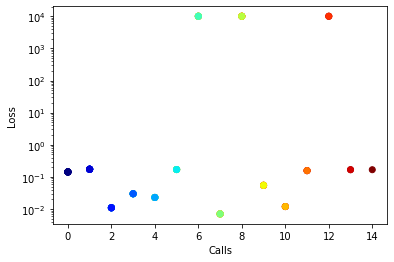

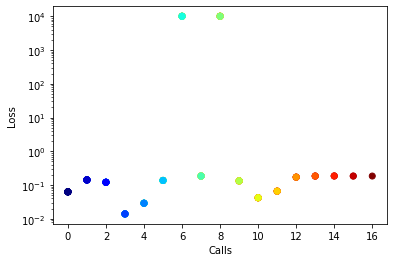

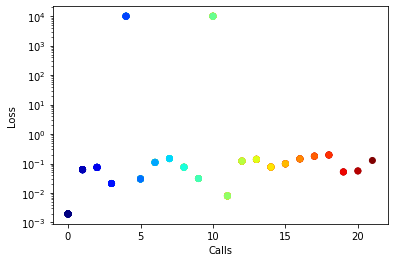

In [118]:
%%time
start_guesses_gp = []
overall_successes_gp = []
final_out_beams_gp = []
for outer, test_absolute_movements in tqdm(enumerate(absolute_movements)):
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
    centroid, out_beam, hist, dw = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    
    opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                              motor_types=move_motors, 
                                              initial_motor_positions=test_absolute_movements, 
                                              random_seed=DEFAULT_RANDOM_SEED,
                                              opt_platform='skopt')
    deltax_callback = DeltaXStopper(configs.DEFAULT_MOTOR_TOLERANCES['hkb_4'])
    deltay_callback = DeltaYStopper(configs.DEFAULT_LOSS_TOLERANCES['centroid'])
    deadline_callback = DeadlineStopper(60)
    plot_callback = LivePlotCallback(opt_trial)
    opt_trial.set_gaussian_process_optimizer_options(n_calls=20, 
                                                     callback=[deltax_callback, 
                                                               deltay_callback, 
                                                               deadline_callback,
                                                               plot_callback.call])
    plot_callback.close()

    opt_results, guesses, solution, success = opt_trial.trials(1, verbose=False)
    
    if not success:
        print('Trying Nelder-Mead from minimum position')
        focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         test_absolute_movements,
                                         movement='absolute')
        opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                              motor_types=move_motors, 
                                              initial_motor_positions=test_absolute_movements, 
                                              random_seed=DEFAULT_RANDOM_SEED,
                                              opt_platform='scipy')
        plot_callback = LivePlotCallback(opt_trial)
        opt_trial.set_scipy_optimizer_options(callback = plot_callback.call)
        opt_results, guesses, solution, success = opt_trial.trials(1, initial_guess=opt_results[0].x, verbose=False)
        plot_callback.close()
    
    focusing_system = opt_trial.focusing_system
    start_guesses_gp.append(guesses)
    overall_successes_gp.append(success)
    final_out_beams_gp.append(out_beam)
    print(f'Test {outer} success {success}')